# Ejercicio : Clasificación con scikit-learn/pyspark.ml.classification

`scikit-learn` (o `sklearn`) es una librería que reúne muchas herramientas para realizar Minería de Datos y _Aprendizaje de Máquinas_. Permite hacer clasificación, clustering, entre otras. Además, incluye varios datasets para aprender a usar la librería.

En este Ejercicio se refuerz los conceptos de _aprendizaje supervisado_ y a mostrar cómo usar `sklearn` y `ml.classification` para entrenar nuestro primer clasificador.

Puedes ejecutar cada una de las celdas de código haciendo click en ellas y presionando `Shift + Enter`. 

También puedes editar cualquiera de estas celdas. Las celdas no son independientes. Es decir, sí importa el orden en el que las ejecutes, y cualquier cambio que hagas se reflejará en las celdas que ejecutes después.

---

Cargamos el Dataset que viene en `https://www.kaggle.com/`(https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). El detalle es el siguiente:

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, responsable de aproximadamente el 11% del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Información de atributos

1) id: identificador único

2) genero: "Masculino", "Femenino" u "Otro"

3) age: edad del paciente

4) hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5) heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) ever_married: "No" o "Sí"

7) work_type: "niños", "Govt_jov", "Nunca_trabajado", "Privado" o "Trabajador por cuenta propia"

8) Residence_type: "Rural" o "Urban"

9) avg_glucose_level: nivel medio de glucosa en sangre

10) bmi: índice de masa corporal

11) smoking_status: "anteriormente fumado", "nunca fumado", "fuma" o "Desconocido" *

12) accidente cerebrovascular: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no

* Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente.


### Se solicita completar los comentarios, el código y los print con "???"

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('C:/Empresa/DUOC/2021/Machine Learning/stroke/healthcare-dataset-stroke-data.csv')

df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Ingrese sus comentarios

¿Que se está realizando?

In [267]:
df= df.drop(['id'],axis=1)
print("???")
print(df.isnull().sum())
print(df.shape[0])
print("Porcentaje de nulos")
print((df.bmi.isnull().sum()*100)/df.shape[0])

print("???")
print(df.groupby(["stroke"])["stroke"].count())

???
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
5110
Porcentaje de nulos
3.9334637964774952
???
stroke
0    4861
1     249
Name: stroke, dtype: int64


In [268]:
print("???")
df.info()
obj_df = df.select_dtypes(include=['object'])
obj_df.isna().sum()
obj_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


# Ingrese sus comentarios

¿Que se está realizando?

In [15]:
all_columns = list(df.columns)
categorical_data_cols  = [column for column in all_columns if len(df[column].unique())<=5]
continuous_data_cols  = [column for column in all_columns if column not in categorical_data_cols]
print(f"Columnas Data continua: {', '.join(continuous_data_cols)}")
print(f"Columnas Data categórica: {', '.join(categorical_data_cols)}")

Columnas Data continua: age, avg_glucose_level, bmi
Columnas Data categórica: gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke


# Ingrese sus comentarios

¿Que se está realizando?

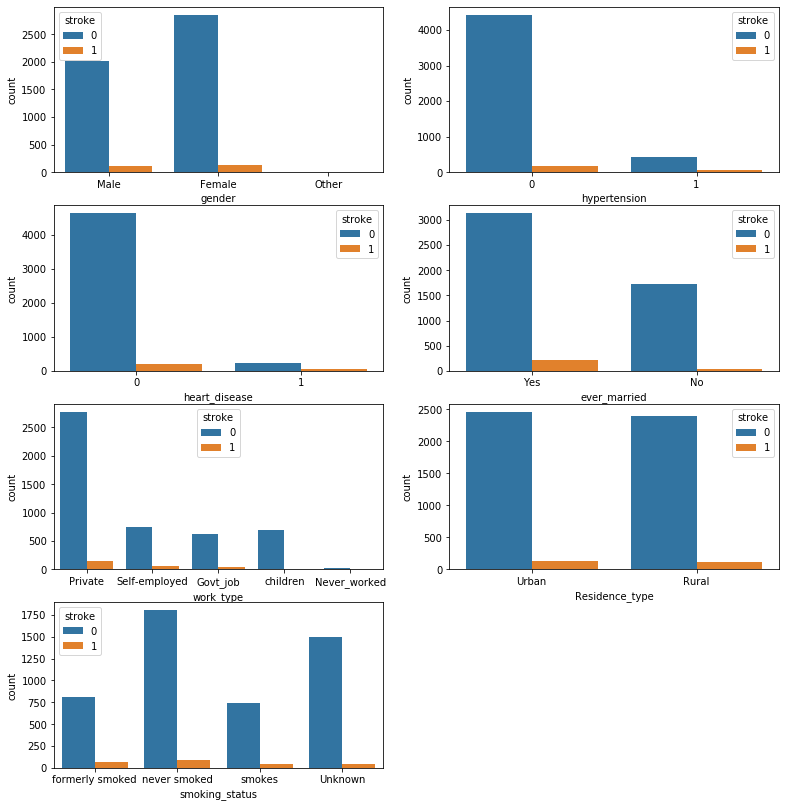

In [16]:
plt.figure(figsize = (13,14))
i = 1
for column in categorical_data_cols[:-1]:
    plt.subplot(4, 2, i)
    sns.countplot(x = df[column], hue = df["stroke"])
    i+=1
plt.show()

# Ingrese sus comentarios

¿Que se está realizando?

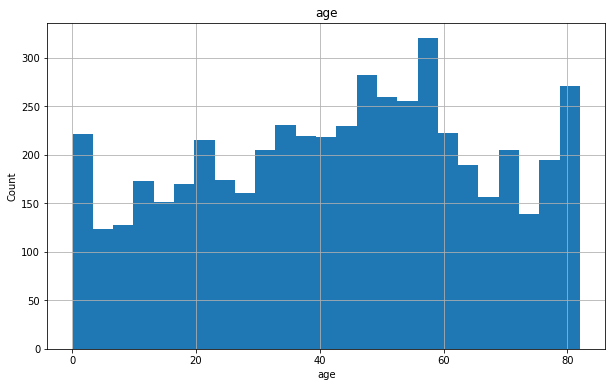

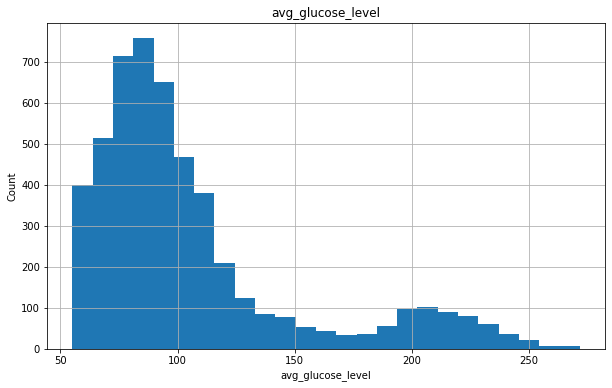

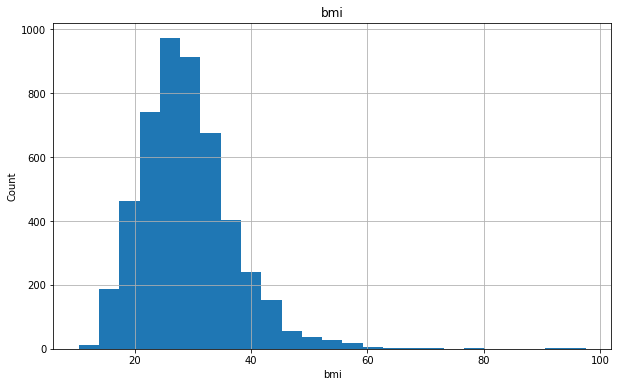

In [17]:
for feature in continuous_data_cols:
    plt.figure(figsize = (10,6))
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Ingrese sus comentarios

¿Que se está realizando?

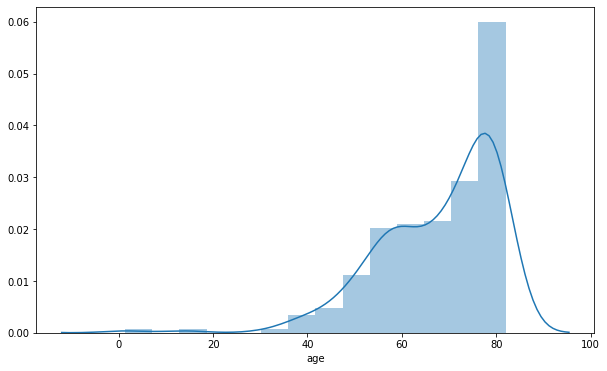

In [18]:
plt.figure(figsize = (10,6))
stroke = df[df['stroke']==1]
sns.distplot(stroke.age)


# Ingrese sus comentarios

¿Que se está realizando?

También implemente el `sklearn.preprocessing.OneHotEncoder` y valide si le entrega mejores resultados

In [19]:
from sklearn.preprocessing import OrdinalEncoder

df["ever_married"] = df["ever_married"].astype(str)
ord_enc = OrdinalEncoder()
df[["gender","ever_married","work_type","Residence_type","smoking_status"]]= ord_enc.fit_transform(df[["gender","ever_married","work_type","Residence_type","smoking_status"]])
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,202.21,NaN,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1


# Ingrese sus comentarios

¿Que se está realizando?

In [20]:
df.corr().style.background_gradient(cmap ='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1,-0.0282018,0.0209943,0.0854468,-0.0310048,0.0564218,-0.00673768,0.05518,-0.0266783,-0.0625805,0.00892887
age,-0.0282018,1,0.276398,0.263796,0.679125,-0.361642,0.01418,0.238171,0.333398,0.265199,0.245257
hypertension,0.0209943,0.276398,1,0.108306,0.164243,-0.0517614,-0.00791345,0.174474,0.167811,0.111038,0.127904
heart_disease,0.0854468,0.263796,0.108306,1,0.114644,-0.0280233,0.00309202,0.161857,0.0413574,0.0484604,0.134914
ever_married,-0.0310048,0.679125,0.164243,0.114644,1,-0.352722,0.00626095,0.155068,0.341695,0.259647,0.10834
work_type,0.0564218,-0.361642,-0.0517614,-0.0280233,-0.352722,1,-0.0073162,-0.0505128,-0.304876,-0.305927,-0.0323161
Residence_type,-0.00673768,0.01418,-0.00791345,0.00309202,0.00626095,-0.0073162,1,-0.00494565,-0.000122441,0.00823732,0.015458
avg_glucose_level,0.05518,0.238171,0.174474,0.161857,0.155068,-0.0505128,-0.00494565,1,0.175502,0.0634369,0.131945
bmi,-0.0266783,0.333398,0.167811,0.0413574,0.341695,-0.304876,-0.000122441,0.175502,1,0.224473,0.0423737
smoking_status,-0.0625805,0.265199,0.111038,0.0484604,0.259647,-0.305927,0.00823732,0.0634369,0.224473,1,0.0281227


# Ingrese sus comentarios

¿Que se está realizando?

In [270]:
df.groupby(df.ever_married.tolist()).size().reset_index().rename(columns={0:'count'})
df = df.drop_duplicates()
print("???")
print(df.count())
df2 = df.dropna()
print("???")
print(df2.count())


???
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64
???
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64


# Ingrese sus comentarios

¿Que se está realizando?

In [271]:
df2.corr().style.background_gradient(cmap ='coolwarm')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1,0.154525,0.0413574,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1,0.175502,0.138936
bmi,0.333398,0.167811,0.0413574,0.175502,1,0.0423737
stroke,0.232331,0.142515,0.137938,0.138936,0.0423737,1


# Ingrese sus comentarios

¿Que se está realizando?

In [272]:
Y_ant = df2["bmi"]
X_ant = df2[["age","work_type","smoking_status"]]
print("???")
print(Y_ant.iloc[1])

# Ingrese sus comentarios

¿Que se está realizando?

In [274]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ant)
X_scaled[1]

ValueError: could not convert string to float: 'Private'

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = RandomForestRegressor()

params = {"n_estimators": [100],
          "min_samples_split": [2,3,4], 
          "max_leaf_nodes": [5,8,10,15]}

grid = GridSearchCV(estimator=model, param_grid=params,cv=5)
grid.fit(X_scaled, Y_ant)

print(grid.best_score_)
print(grid.best_params_)

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scaled,Y_ant,test_size=0.3, shuffle=True)

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
modelf = RandomForestRegressor(**grid.best_params_)
modelf.fit(Xtrain, Ytrain)
Yhatt = modelf.predict(Xtrain)

mse = mean_squared_error(Ytrain, Yhatt)
mae = mean_absolute_error(Ytrain, Yhatt)
R2 = r2_score(Ytrain, Yhatt)

print("MSE train: ",mse)
print("MAE train: ",mae)
print("R^2 train: ",R2)

Yhat = modelf.predict(Xtest)
mse2 = mean_squared_error(Ytest, Yhat)
mae2 = mean_absolute_error(Ytest, Yhat)
R2_2 = r2_score(Ytest, Yhat)

print("MSE test: ",mse2)
print("MAE test: ",mae2)
print("R^2 test: ",R2_2)

In [ ]:
Yhatt1 = modelf.predict(Xtest[20].reshape(1,Xtest.shape[1]))
print("???")
print(Yhatt1)
print("???")
print(Ytest.mean())
print("???")
print(Ytest.std())
print("???")
print(Yhat.mean())
print("???")
print(Yhat.std())
print("???")
print(Ytest.iloc[20])

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
for ll in range(0, df.age.count()-1):
    if df["bmi"].isnull()[ll]:
        df["bmi"][ll] = modelf.predict(df[["age","work_type","smoking_status"]].values[ll].reshape(1, Xtest.shape[1])) 

In [ ]:
print("???")
print(df.isnull().sum())

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
Y = df["stroke"]
X = df.drop(["stroke","ever_married"],axis=1)

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión Normalizada)
    else:
        print('Matriz de confusión sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Ingrese sus comentarios

¿Que se está realizando?

In [ ]:
scaler = StandardScaler()
X_scaled_F = scaler.fit_transform(X)

XtrainF, XtestF, YtrainF, YtestF = train_test_split(X_scaled_F,Y, test_size=0.25, shuffle=True)
skf = StratifiedKFold(n_splits=8)

In [ ]:
scoring_def = 'recall'

# Arból de decisión

Un árbol de decisión es una estructura tipo diagrama de flujo en la que cada nodo interno representa una “prueba” en un atributo (por ejemplo, si una moneda sale cara o cruz), cada rama representa el resultado de la prueba y cada nodo hoja representa una etiqueta de clase (decisión tomado después de calcular todos los atributos).

(Fuente: Wikipedia )

En términos más simples, un árbol de decisión verifica si un atributo o un conjunto de atributos cumple una condición y se basa en el resultado del comprobar, las verificaciones siguientes se realizan. El árbol divide los datos en diferentes partes en función de estos controles.

![](https://miro.medium.com/max/4370/1*ZkQXt7mqI7MXuXhHrfvgtQ.png)


### Ejercicio 1: 

utilice "sklearn.tree import DecisionTreeClassifier" y "GridSearchCV" para obtener el mejor modelo

In [ ]:
##Defina el scoring por el cual obtendremos el mejor modelo, puede ser "Accuracy", "recall", "precision"

scoring_def = 'recall'

In [ ]:
params1 = {"max_depth": [4, 6, 8, 10, 12],
          "criterion" : ['gini','entropy'],
          "class_weight": ['balanced_subsample','balanced'],
          "min_samples_split": [2, 4, 6]} 
#[Inicie código]
model1 = DecisionTreeClassifier() 
grid1 = GridSearchCV(estimator=model1, param_grid=params1,cv=skf, scoring=scoring_def)
grid1.fit(XtrainF, YtrainF)
#[Fin Codigo]
print(grid1.best_score_)
print(grid1.best_params_)
Yhat1 = grid1.best_estimator_.predict(XtestF)

# ¿Cómo evaluamos nuestro modelo?¶

¿Cómo sabemos qué tan bien le fue? Es decir, ¿logró aprender desde los datos cuáles eran las mejores reglas?

Una forma de ver esto es usando el modelo para clasificar nuevas instancias de los datos.

Sin embargo, no tenemos nuevas instancias, ya que entrenamos el clasificador con todos los datos disponibles. Si evaluamos nuestro clasificador con los datos de entrenamiento (es decir, los datos que usamos para entrenar el clasificador y generar un modelo), vamos a tener resultados sobre-optimistas, ya que el clasificador usó esos mismos datos para entrenar. Es como si fueras a dar una prueba y usaras la misma prueba con las respuestas para estudiar.

Esto también nos entrega una pista sobre qué significa que un clasificador aprenda de los datos. Para que un modelo se considere bueno_, no basta con que clasifique correctamente los datos que usó para entrenar, sino que debe clasificar correctamente datos que _no ha visto antes. Esto es a lo que se llama la capacidad de generalización del modelo.

Vamos a definir un par de conceptos antes de continuar:

El conjunto de datos de entrenamiento, o training set, es el conjunto de datos que le damos al clasificador para que pueda encontrar las reglas o parámetros óptimos que le permitan predecir la clase de estos datos.

El conjunto de datos de prueba, o test set, es el conjunto de datos sobre el cual vamos a evaluar el rendimiento de nuestro modelo. Estos datos se eligen antes de cualquier modificación o limpieza del dataset, y sólo se usan para evaluar el modelo entrenado.

(Una vez seguros de que nuestro modelo funciona bien y queremos usarlo "en producción", podemos entrenar con todos los datos disponibles. No antes)

El último punto es muy importante. Si por ejemplo, normalizamos los datos primero, y después separamos en training y test sets, estaremos "contaminando" nuestros datos de entrenamiento, dándoles información del test set y en cierta forma "haciendo trampa", afectando la capacidad de generalización del modelo resultante.

Holdout
Ahora vamos a tomar una muestra de los datos y separarlos en training set y test set, respectivamente. ¿Cómo determinamos esta muestra?

Antes de ejecutar el calsificados, debemos separar nuestro set de datos en datos de entrenamiento y datos de testing, para ello volvemos a crear dataframe en pyspark con sq.createDataFrame(dataset), donde sq corresponde al SQLContext(sc).

Aplicamos training_total.randomSplit(), considerando para nuestro entrenamiento un 75% de datos de entrenamiento y 25% de datos de testing, que podemos ir modificando en acuerdo a aumentar el accuracy del modelo.

Ahora ejecutamos sólo con data de `entrenamiento`

Ejecutamos el clasificador:

Para evaluar, predecimos usando las observaciones en el `test set` y contrastamos el resultado con el `target` correcto.

##### Vemos que el _accuracy_ es de un 95% aprox.. Esto significa que clasificó correctamente el 95% de los datos en `X_test`.

Surgen dos preguntas a partir de esto:

1. ¿Tuvimos suerte? Es decir, si hubiésemos elegido otra partición train/test, ¿obtendríamos resultados diferentes?
2. ¿Qué pasa si las clases están desbalanceadas? ¿Cómo afecta al accuracy si tenemos, por ejemplo, 99% de una clase y 1% de otra?


### Cross-Validation

_¿Tuvimos suerte? Es decir, si hubiésemos elegido otra partición train/test, ¿obtendríamos resultados diferentes?_

Cross-validation nos ayuda a disminuir el efecto del azar (pregunta 1). Por ejemplo, observa qué pasa si cambiamos la semilla aleatoria:

Para disminuir el efecto, _cross-validation_ particiona los datos en $k$ partes iguales, entrena con $k-1$ partes, evalúa en la $k$-ésima, guarda el resultado, y vuelve a repetir el proceso con otras $k-1$ partes hasta haber recorrido todas las partes. Este proceso se llama $k$-fold cross-validation.

Observa que esto implica que el clasificador se entrenará $k$ veces, lo cual puede ser costoso dependiendo del clasificador y de la cantidad de datos.

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)

## Matriz de confusión, Precision y Recall

La _matriz de confusión_ nos permite observar los errores del clasificador:

Por cada clase, podemos determinar el tipo de error que el modelo hace.

- **Verdaderos Positivos (TP)**: el dato X es de la clase C, y el modelo clasifica X como C.
- **Verdaderos Negativos (TN)**: el dato X no es de la clase C, y el modelo clasifica X como algo que no es C.
- **Falsos Positivos (FP)**: el dato X no es de la clase C, pero el modelo clasifica a X como C.
- **Falsos Negativos (FN)**: el dato X es de la clase C, pero el modelo clasifica a X como algo que no es C.

A partir de estas medidas, definimos dos medidas nuevas para una clase, _precision_ y _recall_:

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP+FN}$$

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e2e427ec6dcf2d7882c3bbdc659a8204cba59dcc)

Nota que estas medidas son para una clase en particular. La medida para todo el dataset puede ser el promedio de la medida para cada clase.

Ver más en https://en.wikipedia.org/wiki/Precision_and_recall

In [ ]:
LABELS = ["Sin Infarto","Infarto"]
print(classification_report(YtestF, Yhat1))
cnf_matrix = confusion_matrix(YtestF, Yhat1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=LABELS,
                      title='Matriz de confusión')
plt.show()


# Random Forest

En Random Forest se ejecutan varios algoritmos de árbol de decisiones en lugar de uno solo. Para clasificar un nuevo objeto basado en atributos, cada árbol de decisión da una clasificación y finalmente la decisión con mayor “votos” es la predicción del algoritmo.

![](https://iartificial.net/wp-content/uploads/2019/06/Random-Forest-Bagging.png)

In [ ]:
params2 = {"n_estimators": [100],
          "max_depth": [4, 6, 8, 10, 12],
          "class_weight": ['balanced_subsample','balanced'],
          "criterion" : ['gini','entropy'],
          "min_samples_split": [2, 4, 6],
          "max_features": ['auto', 'sqrt', 'log2']} 

model2 = RandomForestClassifier() 
grid2 = GridSearchCV(estimator=model2, param_grid=params2,cv=skf, scoring='recall')
grid2.fit(XtrainF, YtrainF)
print(grid2.best_score_)
print(grid2.best_params_)
Yhat2 = grid2.best_estimator_.predict(XtestF)


In [ ]:
print(classification_report(YtestF, Yhat2))
cnf_matrix2 = confusion_matrix(YtestF, Yhat2)
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# Regresión Logística

En estadística, la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados (GLM por sus siglas en inglés) que usa como función de enlace la función logit. Las probabilidades que describen el posible resultado de un único ensayo se modelan como una función de variables explicativas, utilizando una función logística.

![](https://programmerclick.com/images/775/62478819e4f6f44e404de47566f85a17.png)

In [ ]:
params3 = {"max_iter": [100],
          "penalty": ['l1', 'l2'],
          "class_weight": ['None','balanced'],
          "solver" : ['newton-cg','lbfgs','liblinear','sag','saga'],
          "C": [1, 2, 3]} 

model3 = LogisticRegression() 
grid3 = GridSearchCV(estimator=model3, param_grid=params3,cv=skf, scoring='recall')
grid3.fit(XtrainF, YtrainF)
print(grid3.best_score_)
print(grid3.best_params_)
Yhat3 = grid3.best_estimator_.predict(XtestF)


In [ ]:
print(classification_report(YtestF, Yhat3))
cnf_matrix3 = confusion_matrix(YtestF, Yhat3)
plt.figure()
plot_confusion_matrix(cnf_matrix3, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# Support Vector Machine

Una máquina de vectores de soporte (SVM) es un modelo de aprendizaje automático supervisado que utiliza algoritmos de clasificación para problemas de clasificación de dos grupos. 

El objetivo del algoritmo de máquina de vectores de soporte es encontrar un hiperplano en un espacio N-dimensional (N - el número de características) que clasifica claramente los puntos de datos.

![](https://iartificial.net/wp-content/uploads/2019/04/Clasificacion-SVM-1024x582.png)

In [ ]:
params4 = {"max_iter": [100],
          "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
          "class_weight": ['None','balanced'],
          "gamma" : ['scale', 'auto'],
          "C": [1, 2, 3],
          "tol":[1e-5, 1e-6]} 

model4 = svm.SVC() 
grid4 = GridSearchCV(estimator=model4, param_grid=params4,cv=skf, scoring='recall')
grid4.fit(XtrainF, YtrainF)
print(grid4.best_score_)
print(grid4.best_params_)
Yhat4 = grid4.best_estimator_.predict(XtestF)

In [ ]:
print(classification_report(YtestF, Yhat4))
cnf_matrix4 = confusion_matrix(YtestF, Yhat4)
plt.figure()
plot_confusion_matrix(cnf_matrix4, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# Vecinos cercanos

La idea es realmente sencilla: el algoritmo clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. Este grupo será, por tanto, el de mayor frecuencia con menores distancias.

El K-NN es un algoritmo de aprendizaje supervisado, es decir, que a partir de un juego de datos inicial su objetivo será el de clasificar correctamente todas las instancias nuevas. El juego de datos típico de este tipo de algoritmos está formado por varios atributos descriptivos y un solo atributo objetivo (también llamado clase).

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR54tM0clp38B9THiQBD1C-cR4HJsWUe8oHL6lf4QDyqLT1iZ6s0uqmEboTsh29hCLQ7q0&usqp=CAU)

In [ ]:
params5 = {"n_neighbors": [2, 5, 10, 12],
          "algorithm": ['ball_tree', 'kd_tree', 'brute', 'auto'],
          "weights": ['uniform', 'distance'],
          "leaf_size" : [30, 40],
          "p": [1, 2]} 

model5 = KNeighborsClassifier() 
grid5 = GridSearchCV(estimator=model5, param_grid=params5,cv=skf, scoring='recall')
grid5.fit(XtrainF, YtrainF)
print(grid5.best_score_)
print(grid5.best_params_)
Yhat5 = grid5.best_estimator_.predict(XtestF)

In [ ]:
print(classification_report(YtestF, Yhat5))
cnf_matrix5 = confusion_matrix(YtestF, Yhat5)
plt.figure()
plot_confusion_matrix(cnf_matrix5, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# Bagging

En los algoritmos de conjunto, los métodos de empaquetamiento forman una clase de algoritmos que construyen varias instancias de un estimador de caja negra en subconjuntos aleatorios del conjunto de entrenamiento original y luego agregan sus predicciones individuales para formar una predicción final. Estos métodos se utilizan como una forma de reducir la varianza de un estimador base (por ejemplo, un árbol de decisión), introduciendo la aleatorización en su procedimiento de construcción y luego formando un conjunto a partir de ella. En muchos casos, los métodos de ensacado constituyen una forma muy sencilla de mejorar respecto a un único modelo, sin necesidad de adaptar el algoritmo de base subyacente. Dado que proporcionan una manera de reducir el ajuste excesivo, los métodos de ensacado funcionan mejor con modelos fuertes y complejos (por ejemplo, árboles de decisión completamente desarrollados), en contraste con los métodos de refuerzo que generalmente funcionan mejor con modelos débiles (por ejemplo, árboles de decisión poco profundos).

Los métodos de Bagging vienen en muchos tipos, pero la mayoría difieren entre sí por la forma en que dibujan subconjuntos aleatorios del conjunto de entrenamiento:

Cuando se dibujan subconjuntos aleatorios del conjunto de datos como subconjuntos aleatorios de las muestras, este algoritmo se conoce como Pasting.
Cuando las muestras se toman con reemplazo, entonces el método se conoce como Bagging.
Cuando los subconjuntos aleatorios del conjunto de datos se dibujan como subconjuntos aleatorios de las características, el método se conoce como Subespacios aleatorios.
Por último, cuando los estimadores de base se construyen sobre subconjuntos de muestras y características, el método se conoce como Parches aleatorios.

![](https://bookdown.org/content/2031/images/bootstraping.png)

In [ ]:
params6 = {"n_estimators":[100],
          "max_samples":[6, 8]} 

model6 = BaggingClassifier(grid1.best_estimator_)
grid6 = GridSearchCV(estimator=model6, param_grid=params6,cv=skf, scoring='recall')
grid6.fit(XtrainF, YtrainF)
print(grid6.best_score_)
print(grid6.best_params_)
Yhat6 = grid6.best_estimator_.predict(XtestF)

In [ ]:
print(classification_report(YtestF, Yhat6))
cnf_matrix6 = confusion_matrix(YtestF, Yhat6)
plt.figure()
plot_confusion_matrix(cnf_matrix6, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# Clasificadores binarios

Pasamos a repasar clasificadores binarios, que se pueden utilizar. Pero como en el set tenemos multiclases, el modelo debe pasar por la reduccción "One-vs-Al" componente "OneVsRest" que en base a un clasificador crea una binaria clasificación.

# Gradient-Boosted tree Classifier

Los clasificadores de aumento de gradiente son un grupo de algoritmos de aprendizaje automático que combinan muchos modelos de aprendizaje débiles para crear un modelo predictivo sólido. Los árboles de decisión generalmente se usan al aumentar el gradiente.

![](https://2.bp.blogspot.com/-Dx97g4KSWGw/Ww0Aa8RyGUI/AAAAAAAABnc/hdEpxgQ-XforLeICrdwYisCYNJN8KuLDQCLcBGAs/s400/gradient-boosting.png)

In [ ]:
params7 = {"n_estimators": [100],
          "loss": ['deviance', 'exponential'],
          "learning_rate" : [0.1, 0.01, 0.001],
          "max_features": ['auto', 'sqrt', 'log2'],
          "max_depth": [8, 10, 12],
          "min_samples_split": [2, 4, 6]
          } 

model7 = GradientBoostingClassifier()
grid7 = GridSearchCV(estimator=model7, param_grid=params7,cv=skf, scoring='recall')
grid7.fit(XtrainF, YtrainF)
print(grid7.best_score_)
print(grid7.best_params_)
Yhat7 = grid7.best_estimator_.predict(XtestF)

In [ ]:
print(classification_report(YtestF, Yhat7))
cnf_matrix7 = confusion_matrix(YtestF, Yhat7)
plt.figure()
plot_confusion_matrix(cnf_matrix7, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# ADA-Boost

AdaBoost es un algoritmo de impulso específico (también conocido como AdaBoost discreto) desarrollado para problemas de clasificación. 
En cada iteración, AdaBoost identificará el punto de datos mal clasificado, aumentando así su peso (en cierto sentido, reduciendo el peso del punto correcto), de modo que el siguiente clasificador será más Presta atención para corregirlo.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKIbQ5uXeWC1vq04hsNL0VNnWRZotwcYVur_W1Pzr8NlRKMnXGTmOrNhakHlXHTHlemU4&usqp=CAU)

In [ ]:
params8 = {"learning_rate" : [0.1, 0.01, 0.001],
          "n_estimators": [100],
          "algorithm" : ['SAMME', 'SAMME.R']
          } 


model8 = AdaBoostClassifier(grid1.best_estimator_)
grid8 = GridSearchCV(estimator=model8, param_grid=params8,cv=skf, scoring='recall')
grid8.fit(XtrainF, YtrainF)
print(grid8.best_score_)
print(grid8.best_params_)
Yhat8 = grid8.best_estimator_.predict(XtestF)

In [ ]:
print(classification_report(YtestF, Yhat8))
cnf_matrix8 = confusion_matrix(YtestF, Yhat8)
plt.figure()
plot_confusion_matrix(cnf_matrix8, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

# Stacking

El aprendizaje integrado se divide principalmente en métodos de ensacado, refuerzo y apilamiento. El proceso de apilamiento se muestra en la siguiente figura. Primero, m clasificadores base (o regresores) se entrenan en el conjunto de entrenamiento. Los resultados de predicción (que pueden ser etiquetas o probabilidades) generados por estos m clasificadores se ingresan como nuevas característicasMeta-ClassifierPara entrenar Meta-Classifier, generalmente Meta-Classifier usará LogisticRegression. En la predicción, cada muestra pasa primero todos los m clasificadores para obtener una nueva característica (etiqueta o probabilidad), y la nueva característica se ingresa al Metaclasificador para obtener el resultado final de la predicción.

![](https://ichi.pro/assets/images/max/724/1*3LgG3geyPppu52SwZ4b5kQ.png)

In [275]:
params9 = {"stack_method": ['auto', 'predict_proba', 'decision_function', 'predict']} 

estimators = [
        ('dt', grid1.best_estimator_),
        ('rf', grid2.best_estimator_),
        ('sv', grid4.best_estimator_),
        ('kn', grid5.best_estimator_)
    ]
model9 = StackingClassifier(
        estimators=estimators, final_estimator=grid3.best_estimator_
    )
grid9 = GridSearchCV(estimator=model9, param_grid=params9,cv=skf, scoring='recall')
grid9.fit(XtrainF, YtrainF)
print(grid9.best_score_)
print(grid9.best_params_)
Yhat9 = grid9.best_estimator_.predict(XtestF)

C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packag

C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packag

C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator dt does not implement the method decision_function.

  FitFailedWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be se

C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\m_mir\anaconda3\lib\site-packag

0.8369565217391304
{'stack_method': 'auto'}


              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1213
           1       0.13      0.88      0.22        65

    accuracy                           0.69      1278
   macro avg       0.56      0.78      0.52      1278
weighted avg       0.95      0.69      0.78      1278

Confusion matrix, without normalization
[[827 386]
 [  8  57]]


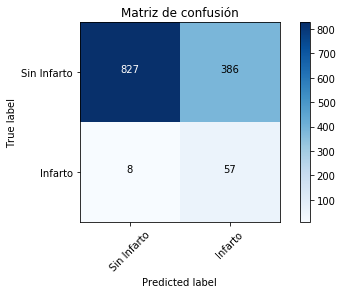

In [276]:
print(classification_report(YtestF, Yhat9))
cnf_matrix9 = confusion_matrix(YtestF, Yhat9)
plt.figure()
plot_confusion_matrix(cnf_matrix9, classes=LABELS,
                      title='Matriz de confusión')
plt.show()

In [277]:
def find_best_model_using_gridsearchcv(X,y):
    modelos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'penalty' : ['l1', 'l2']
                }
        },
        'RandomForest_Classifier': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ['gini','entropy'],
                'n_estimators': [10,20,50,75]
               }
            },
             'KNeighbors_Classifier': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [1,2,5,10,12,8]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini','entropy'],
                'splitter': ['best','random']
            }
        },
        'Support_Vector': {
            'model': svm.SVC(),
            'params': {
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma' : ['scale', 'auto']       
            }
        }
     }
    scores = []
    cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=0)
    for s_model, config in modelos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': s_model,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
find_best_model_using_gridsearchcv(X,Y)

C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\m_mir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL

# En conclusión

El flujo usual a la hora de entrenar un clasificador es el siguiente:

1. Tener datos. Verificar la fuente de los datos, la existencia de sesgos (sesgo de selección, sesgo del superviviente, sesgos sociodemográficos, etc.).
2. Separar datos en train y test set.
3. Realizar exploración y limpieza de datos en ambos sets, de manera independiente.
4. Elegir clasificadores apropiados para el dominio del problema (próxima clase de cátedra)
5. Determinar métricas de entrenamiento usando cross-validation, si es posible (más de esto en el lab de mañana).
6. Evaluar en el test set.
7. Usar todos los datos para entrenar el modelo que irá "a producción"

# Referencias

1. Documentación de scikit-learn. http://scikit-learn.org/stable/index.html
2. Precision y Recall. https://en.wikipedia.org/wiki/Precision_and_recall
3. Machine Learning 101 (Google). https://docs.google.com/presentation/d/1kSuQyW5DTnkVaZEjGYCkfOxvzCqGEFzWBy4e9Uedd9k/preview?imm_mid=0f9b7e&cmp=em-data-na-na-newsltr_20171213#slide=id.g168a3288f7_0_58
4. WEKA (un programa visual con clasificadores y otras herramientas para ML). https://www.cs.waikato.ac.nz/ml/weka/
5. Curso de Data Mining con WEKA. https://www.cs.waikato.ac.nz/ml/weka/mooc/dataminingwithweka/